In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lengthscale = 10 
k_sig = 1
noise_sig = 0.01

k is our kernel we use a matern (3,2
)
\begin{align}
    k(\mathbf{x}_n, \mathbf{x}_m) = \sigma_{k}\left( 1 +\frac{ \sqrt{3}\|\mathbf{x}_n - \mathbf{x}_m\| }{\ell}\right)\exp\left(-\frac{ \sqrt{3}\|\mathbf{x}_n - \mathbf{x}_m\| }{\ell}\right),
\end{align}

Notice that $\sigma_k$ is in our kernel function and not the same as $\sigma_n$

In [3]:
k = lambda x1, x2: k_sig*(1 + np.sqrt(3)*np.abs(x1-x2.T)/lengthscale) *np.exp(-np.sqrt(3)*np.abs(x1-x2.T)/lengthscale)

In [4]:
x1 = np.array([1,1,1])[:,None]
x2 = np.array([2,2,2])[:,None]

In [5]:
x = np.linspace(1,100,num=100)[:,None]
K = k(x,x)
mu = np.zeros(len(x))
f = np.random.multivariate_normal(mu,K)

In [6]:
f = np.zeros([100,10])
for i in range(10):
    f[:,i] = np.random.multivariate_normal(mu,K)

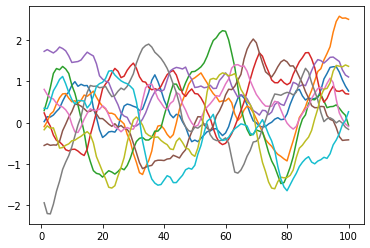

In [7]:
plt.plot(x,f)
plt.show()

$f$ is our prior function that we can evaluate by feeding it x coordinates, the kernel determines how the functions looks.

- Play around with $\ell$ and $\sigma_k$

When we see obervations of the function we assume it is corrupted $y = f + \epsilon$ where $\epsilon$ is your usual  noise  $N(0,I\sigma_n)$

In [8]:
y = np.array([0,2])
x_test = np.array([20,80])

So $y$ is observed with its corresponding loction in x. We would want to now use that information to build a posterior function over the space. What we want to do is form a postterior function over the space that uses the prior and the likelihood. 

Our prior is:

\begin{align}
f(x) \sim \mathcal{GP}\left(0 \, , \, k\left(x, x'\right)\right).
\end{align}

And our likelihood function is Gaussian as $P(y_i \mid f_i) = N(y_i;f_i,\sigma_n)$. So we can perform usual Bayes rule but use the properties of Gaussians.


In [9]:
K_fy = k(x,x_test[:,None])
Ky_inv = np.linalg.inv(k(x_test[:,None],x_test[:,None])+np.diag(noise_sig*np.ones([len(y),1])[:,0]))

In [10]:
u_post = K_fy @ Ky_inv @ y[:,None] # How are these formulas derived??
K_post = K - K_fy @ Ky_inv @ K_fy.T

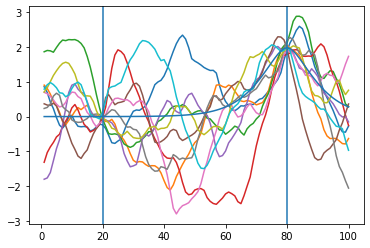

In [11]:
f_p = np.zeros([100,10])
for i in range(10):
    f_p[:,i] = np.random.multivariate_normal(u_post[:,0],K_post)
plt.plot(x,f_p)
plt.plot(x,u_post)
plt.axvline(x=x_test[0])
plt.axvline(x=x_test[1])
plt.show()

- What is happening at our test points?
- What happens if change the noise?
- Can you plot a mean and uncertainty bounds?
- Add more test points?